<a href="https://colab.research.google.com/github/Mushtari-Sadia/Flood-Forecasting-with-ML/blob/master/Development_of_Flood_Forecasting_System_Using_Different_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important Links
**We will be uploading the plots and values of accuracy here (with meaningful filename) :**


1.   *(train test split :- train : 1996-2016, test - 2017-2020)* https://drive.google.com/drive/folders/11WwwMAWC8_nhlGBWmwsnKlphhEkL1NnG?usp=sharing
2.   *(train test split :- train : 1996-2015, test - 2016-2018)* https://drive.google.com/drive/folders/1h1t4nnczVFVO_0OIIv3VzNg-o1AYHH5b?usp=sharing



The dataset preparation work we did can be found here :


1.   https://colab.research.google.com/drive/1sSUnY5CA_sosrOqYVbqtZ-3ux1t8D_3q?usp=sharing

2.   https://colab.research.google.com/drive/17gDxN6ch85erkhdAj5mc370RcJ4onV3W?usp=sharing

3.   https://colab.research.google.com/drive/1W52GitlhhxQmFufynN3duRZRBqLcIJQm?usp=sharing

4.   https://colab.research.google.com/drive/10HXN047DmRSNwNmQZ0lnZcGr_tkb4uiX?usp=sharing

5.   https://colab.research.google.com/drive/11XFuY0gHW2eBOV4S4i_ZtXgKvd_tbag7?usp=sharing


The data can be found here :

https://drive.google.com/drive/folders/1ZN6sL0saqWYPCAqBx-cM-PpGEiZWGttU?usp=sharing

In [ ]:
#keeping all the import statements in one place
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
import plotly.express as px
from torch import nn, optim
import torch.nn.functional as F
from sklearn import datasets, linear_model, metrics 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from plotly.offline import iplot, plot, download_plotlyjs, init_notebook_mode
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.lines as ml

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#installing dependencies
!pip install -U kaleido

     |████████████████████████████████| 74.0MB 95kB/s 


In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Preparing Dataset


Download 'FINAL_FULL_DATASET' from here and upload it :

https://drive.google.com/drive/folders/1ZN6sL0saqWYPCAqBx-cM-PpGEiZWGttU?usp=sharing







In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FINAL_FULL_DATASET.csv to FINAL_FULL_DATASET.csv


Here,
Parameter(s):

**Wlavg-36** 	Daily Water level of station 36(our study area)									
**T2MDEW** Dew/Frost Point at 2 Meters (C) 										
**T2M_MAX** Maximum Temperature at 2 Meters (C) 										
**T2M**  Temperature at 2 Meters (C) 										
**PRECTOT**  Precipitation (mm day-1) 										
**T2M_MIN** Minimum Temperature at 2 Meters (C) 										
**RH2M**  Relative Humidity at 2 Meters (%) 										
**WS10M**  Wind Speed at 10 Meters (m/s) 	


LON,LAT ID :

1. 25.25,90.25
2. 25.25,90.75
3. 25.75,91.25
4. 25.25,89.75
5. 25.75,90.25
6. 25.75,90.75

***(So, PRECTOT3 means precipitation of 25.75,91.25)***

In [ ]:
df = pd.read_csv('FINAL_FULL_DATASET.csv',header=0, parse_dates=[0],index_col=0, squeeze=True)
df

Wlavg-36  PRECTOT1  RH2M1  ...  WS10M6   T2M6  T2MDEW6
Date                                   ...                        
1996-01-01     5.024      0.00  60.11  ...    1.58  16.04    11.14
1996-01-02     4.994      0.00  60.16  ...    1.80  16.25    11.30
1996-01-03     4.974      0.00  56.95  ...    1.71  16.72    10.74
1996-01-04     4.946      0.00  65.77  ...    1.56  15.87    10.20
1996-01-05     4.916      0.00  63.31  ...    1.27  15.57    10.81
...              ...       ...    ...  ...     ...    ...      ...
2020-07-27     9.350     22.67  92.95  ...    2.39    NaN    25.54
2020-07-28     9.380     20.97  87.63  ...    1.72    NaN    24.75
2020-07-29     9.350     26.68  91.64  ...    2.25    NaN    25.48
2020-07-30     9.300     12.70  92.60  ...    3.76    NaN    25.25
2020-07-31     9.250      8.56  87.55  ...    2.57    NaN    24.95

[8975 rows x 42 columns]

In [ ]:
df.describe()

Wlavg-36     PRECTOT1  ...         T2M6      T2MDEW6
count  8975.000000  8975.000000  ...  7636.000000  8975.000000
mean      6.838578     6.082499  ...    23.387021    18.130408
std       1.947724    11.190523  ...     4.713958     6.465120
min       2.840000     0.000000  ...     9.010000    -2.070000
25%       5.320000     0.000000  ...    19.397500    12.380000
50%       6.480000     1.130000  ...    25.340000    19.860000
75%       8.410000     7.570000  ...    27.272500    24.190000
max      12.150000   134.500000  ...    31.880000    26.870000

[8 rows x 42 columns]

# Defining models based on input parameters

Now, we will define keywords based on which parameters we will take for training our models.



1.   **input_param_1** : Wlavg-36, PRECTOT

2.   **input_param_2** : Wlavg-36, RH2M, T2M_MAX,	WS10M

3.   **input_param_3** : Wlavg-36, PRECTOT, RH2M, T2M_MAX,	WS10M

We also add another input parameter list (input_param_4) later, based on correlation values of features. Please refer to the section "Correlation of Features".



In [ ]:
#understanding this code isn't necessary
li = [1,2,3,4,5,6]
X_1 = df[['Wlavg-36']]
X_2 = df[['Wlavg-36']]
X_3 = df[['Wlavg-36']]
for i in li :
  X_1["PRECTOT"+str(i)] = df["PRECTOT"+str(i)].astype(float)

  X_2["RH2M"+str(i)] = df["RH2M"+str(i)].astype(float)
  X_2["T2M_MAX"+str(i)] = df["T2M_MAX"+str(i)].astype(float)
  X_2["WS10M"+str(i)] = df["WS10M"+str(i)].astype(float)

  X_3["PRECTOT"+str(i)] = df["PRECTOT"+str(i)].astype(float)
  X_3["RH2M"+str(i)] = df["RH2M"+str(i)].astype(float)
  X_3["T2M_MAX"+str(i)] = df["T2M_MAX"+str(i)].astype(float)
  X_3["WS10M"+str(i)] = df["WS10M"+str(i)].astype(float)


X_dict = {"input_param_1" : X_1, "input_param_2" : X_2, "input_param_3" : X_3}

#defining output
Y_dict = df[['Wlavg-36']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Now,

to access type 1 of input : X_dict["input_param_1"]

to access type 2 of input : X_dict["input_param_2"]

to access type 3 of input : X_dict["input_param_3"]

to access output : Y_dict

# Defining models based on input time frame and output time frame

For predicting water level of today, we can feed the model data of previous 3 days. Or previous 7 days. Or we can predict the water level of the next day or the next next day and so on. 

So, 
> input : T-1,T-2,...,T-N (T=day,N=n_steps_in)

> output : T+0 / T+1 / ... / T+N (T=day,N=n_steps_out)








In [ ]:
#understanding this code isn't necessary
def split_dataset(X,Y,n_steps_in,n_steps_out) :
  X_new = pd.DataFrame()
  for k in range(len(X.columns)) :
    for i in range(n_steps_in):
      X_new[X.columns[k] + '(-' + str(n_steps_in-i) + ')'] = X.iloc[:,k].shift(-i)

  X_new = X_new[:-(n_steps_in + n_steps_out)]

  Y_new = pd.DataFrame()
  Y_new[Y.columns[0]+'(+'+str(n_steps_out)+')'] = Y.iloc[:,0].shift(-(n_steps_in + n_steps_out))
  Y_new = Y_new[:-(n_steps_in + n_steps_out)]

  return X_new,Y_new



If we feed the model data of previous 3 days and predict water level of today : 

input : T-1,T-2,T-3

output : T+0

In [ ]:
n_steps_in = 3 #change it as you want
n_steps_out = 0 #change it as you want
X = X_dict["input_param_1"]
Y = Y_dict
X,Y = split_dataset(X,Y,n_steps_in,n_steps_out)
X.head()

Wlavg-36(-3)  Wlavg-36(-2)  ...  PRECTOT6(-2)  PRECTOT6(-1)
Date                                    ...                            
1996-01-01         5.024         4.994  ...          0.00          0.00
1996-01-02         4.994         4.974  ...          0.00          0.01
1996-01-03         4.974         4.946  ...          0.01          0.00
1996-01-04         4.946         4.916  ...          0.00          0.00
1996-01-05         4.916         4.906  ...          0.00          0.00

[5 rows x 21 columns]

In [ ]:
Y.head()

Wlavg-36(+0)
Date                    
1996-01-01         4.946
1996-01-02         4.916
1996-01-03         4.906
1996-01-04         4.898
1996-01-05         4.880

The function below describes the model index which has the input parameters,input time frame and output time frame incorporated in it.

For example,let's say our model name is model1_3_0. It means that the model has input_param_1,n_steps_in=3,n_steps_out=0.

In [ ]:
def decrypt_model_index(model_idx) :
  list_of_parameters = ["0th_index_empty","Wlavg-36, PRECTOT","Wlavg-36, RH2M, T2M_MAX, WS10M","Wlavg-36, PRECTOT, RH2M, T2M_MAX, WS10M","Based on correlation values"]
  inp_param,inp_day,op_day = model_idx.split("_")
  inp_param,inp_day,op_day = int(inp_param),int(inp_day),int(op_day)
  inp_param_str = list_of_parameters[inp_param]
  inp_day_str = "T(-" + str(inp_day) + ")"
  while(inp_day > 1) :
    inp_day -= 1
    inp_day_str += ",T(-" + str(inp_day) + ")"
  op_day_str = "T(+" + str(op_day) + ")"

  return inp_param_str,inp_day_str,op_day_str

inp_param_str,inp_day_str,op_day_str = decrypt_model_index("1_3_0")
print("input parameters : ",inp_param_str)
print("input days : ",inp_day_str)
print("output days : ",op_day_str)

input parameters :  Wlavg-36, PRECTOT
input days :  T(-3),T(-2),T(-1)
output days :  T(+0)


# Creating a dataframe where all information from trained models will be stored

Upload previously obtained 'summary_of_models.csv' file. You can find it here : 

(train test split :- train : 1996-2016, test - 2017-2020) https://drive.google.com/drive/folders/11WwwMAWC8_nhlGBWmwsnKlphhEkL1NnG?usp=sharing


(train test split :- train : 1996-2015, test - 2016-2018) https://drive.google.com/drive/folders/1h1t4nnczVFVO_0OIIv3VzNg-o1AYHH5b?usp=sharing

In [ ]:
uploaded = files.upload()
acc_df = pd.read_csv('summary_of_models.csv',header=0)
acc_df.head()

Saving summary_of_models.csv to summary_of_models.csv


Model  ... normalized_centered_root_mean_square_error
0  DTR1_3_0  ...                                   0.067013
1  DTR1_3_1  ...                                   0.096233
2  DTR1_3_2  ...                                   0.127561
3  DTR1_4_0  ...                                   0.068793
4  DTR1_4_1  ...                                   0.094837

[5 rows x 11 columns]

In [ ]:
column_names = ['Model','Input Parameters','Input Days','Output day','Epoch','mean_squared_error', 'mean_absolute_error', 'explained_variance_score','r2_score','mean_relative_error','normalized_centered_root_mean_square_error']
#uncomment the line below if you want to delete all previous model data and start from scratch (*CAUTION*)
#acc_df = pd.DataFrame(columns = column_names)  


# Performance Evaluation Error Metrics 

#MSE (Mean squared error):
The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

#MAE (Mean absolute error) :
The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss

#Explained variance score
The explained_variance_score computes the explained variance regression score.

#R² score, the coefficient of determination
The r2_score function computes the coefficient of determination, usually denoted as R²

# MRE:
MRE represents the magnitude and direction of error with positive value referring to overestimation
while negative value referring to underestimation.

# NCRMSE:
Normalized Centered Root Mean Square Error


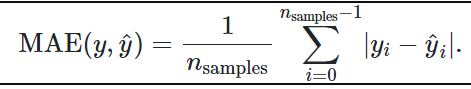

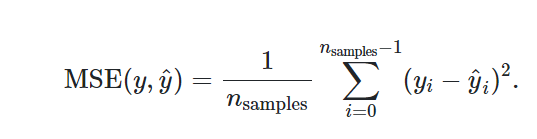

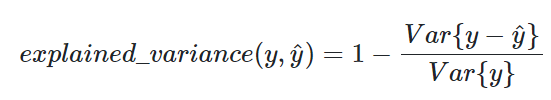

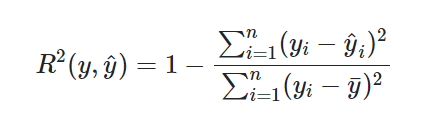

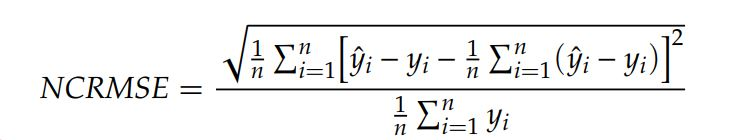

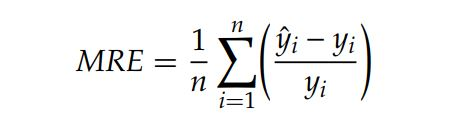

In [ ]:
#MRE - Mean Relative Error

def mre(y,yhat):
  n = len(y)
  mre = np.sum((yhat-y)/y)/n
  return mre

#NCRMSE - Normalized Centered Root Mean Square Error

def ncrmse(y,yhat):
  n = len(y)
  lob = np.sqrt(np.sum(np.square(yhat-y-np.sum(yhat-y)/n))/n)
  hor = np.sum(y)/n
  ncrmse = lob/hor
  return ncrmse

y = np.arange(1,100,2)
yhat = np.arange(2,52)

print(mre(y,yhat))
print(ncrmse(y,yhat))

-0.4118667545457527
0.28861739379323625


In [ ]:
def evaluate_performance(y_test,y_test_pred) :
  mse = mean_squared_error(y_test,y_test_pred)
  mae = mean_absolute_error(y_test,y_test_pred)
  evs = explained_variance_score(y_test,y_test_pred)
  r2 = r2_score(y_test,y_test_pred)
  mre_score = mre(y_test,y_test_pred)
  ncrmse_score = ncrmse(y_test,y_test_pred)

  return mse,mae,evs,r2,mre_score,ncrmse_score

# Correlation of Features

Reference: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.
For example, two variables which are linearly dependent (say, x and y which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2)

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

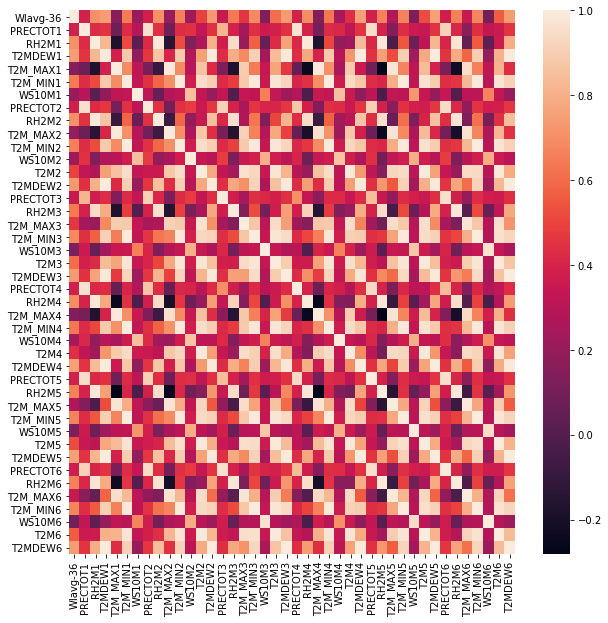

In [ ]:
import seaborn as sns

#Generating the correlation Matrix
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,ax = ax)

we compare the correlation between features and can remove one of two features that have a correlation higher than 0.9 since they are linearly dependent

In [ ]:
#Fill an array with the value True of the size of columns
columns = np.full((corr.shape[0],), True, dtype=bool)

#The matrix is symmetric.. M(i,j) = M(j,i) --> the features are the same for both
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = df.columns[columns]
excluded_columns = df.columns[columns ==  False]
print("Selected Columns :" , selected_columns)
print("Excluded Columns :" , excluded_columns)

Selected Columns : Index(['Wlavg-36', 'PRECTOT1', 'RH2M1', 'T2MDEW1', 'T2M_MAX1', 'T2M_MIN1',
       'WS10M1', 'WS10M2', 'WS10M3', 'WS10M4', 'WS10M5'],
      dtype='object')
Excluded Columns : Index(['PRECTOT2', 'RH2M2', 'T2M_MAX2', 'T2M_MIN2', 'T2M2', 'T2MDEW2',
       'PRECTOT3', 'RH2M3', 'T2M_MAX3', 'T2M_MIN3', 'T2M3', 'T2MDEW3',
       'PRECTOT4', 'RH2M4', 'T2M_MAX4', 'T2M_MIN4', 'T2M4', 'T2MDEW4',
       'PRECTOT5', 'RH2M5', 'T2M_MAX5', 'T2M_MIN5', 'T2M5', 'T2MDEW5',
       'PRECTOT6', 'RH2M6', 'T2M_MAX6', 'T2M_MIN6', 'WS10M6', 'T2M6',
       'T2MDEW6'],
      dtype='object')


Adding a new input parameter list based on correlation values :

In [ ]:
X_dict["input_param_4"] = df[['Wlavg-36', 'PRECTOT1', 'RH2M1', 'T2MDEW1', 'T2M_MAX1', 'T2M_MIN1',
       'WS10M1', 'WS10M2', 'WS10M3', 'WS10M4', 'WS10M5']]

# P values of features

RESOURCE : https://www.machinelearningplus.com/statistics/p-value/

The null hypothesis assumes there is ‘no effect’ or ‘relationship’ by default.The alternate hypothesis (HA) is always framed to negate the null hypothesis. P value is used to determine if the data is statistically incompatible with the null hypothesis.The P Value is the probability of seeing the effect(E) when the null hypothesis is true.

P- Value  = P(E|H0)

If you think about it, we want this probability to be very low. p value measures the probability of seeing the effect when the null hypothesis is true. A sufficiently low value is required to reject the null hypothesis.Alpha Level is the cutoff probability for p-value to establish statistical significance for a given hypothesis test.
For an observed effect to be considered as statistically significant, the p-value of the test should be lower than the pre-decided alpha value.

Typically for most statistical tests(but not always), alpha is set as 0.05.

In which case, it has to be less than 0.05 to be considered as statistically significant. 

So if P Value is smaller than 0.05 for any feature, we decide that the feature is related with predicting the output

In [ ]:
import statsmodels.formula.api as smf
from patsy.builtins import *

regFormula = 'Q("Wlavg-36") ~ Q("PRECTOT1")'
for column in df.columns:
  if column == "Wlavg-36" or column == "PRECTOT1":
    continue
  regFormula += '+ Q("' + column + '")'

mod = smf.ols(formula= regFormula , data=df).fit()

#mod = smf.ols(formula= 'Q("Wlavg-36") ~ Q("PRECTOT1") + Q("RH2M1") + Q("T2M_MAX1") + Q("WS10M1") + Q("PRECTOT2") + Q("RH2M2") + Q("T2M_MAX2") + Q("T2M_MIN2") + Q("WS10M2") + Q("T2M2") + Q("T2MDEW2") + Q("PRECTOT3") + Q("RH2M3") + Q("T2M_MAX3") + Q("T2M_MIN3") + Q("WS10M3") + Q("T2M3") + Q("T2MDEW3") + Q("PRECTOT4") + Q("RH2M4") + Q("T2M_MAX4") + Q("T2M_MIN4") + Q("WS10M4") + Q("T2M4") + Q("T2MDEW4") + Q("PRECTOT5") + Q("RH2M5") + Q("T2M_MAX5") + Q("T2M_MIN5") + Q("WS10M5") + Q("T2M5") + Q("T2MDEW5") + Q("PRECTOT6") + Q("RH2M6") + Q("T2M_MAX6") + Q("T2M_MIN6") + Q("WS10M6") + Q("T2M6") + Q("T2MDEW6")' , data=df).fit()

print(mod.pvalues)

PValues = mod.pvalues

lessthanAlpha = PValues <0.05

print(lessthanAlpha)



Intercept        1.142485e-02
Q("PRECTOT1")    5.709934e-02
Q("RH2M1")       2.594339e-02
Q("T2MDEW1")     6.524399e-02
Q("T2M_MAX1")    1.885669e-02
Q("T2M_MIN1")    9.633684e-05
Q("WS10M1")      5.161344e-10
Q("PRECTOT2")    1.400055e-02
Q("RH2M2")       9.723810e-03
Q("T2M_MAX2")    6.241895e-04
Q("T2M_MIN2")    4.798504e-05
Q("WS10M2")      1.573218e-01
Q("T2M2")        9.342333e-01
Q("T2MDEW2")     4.615568e-04
Q("PRECTOT3")    7.563188e-01
Q("RH2M3")       3.945983e-01
Q("T2M_MAX3")    1.041010e-04
Q("T2M_MIN3")    8.244644e-01
Q("WS10M3")      9.397584e-02
Q("T2M3")        6.145176e-04
Q("T2MDEW3")     9.767154e-03
Q("PRECTOT4")    2.631546e-01
Q("RH2M4")       3.052955e-05
Q("T2M_MAX4")    7.542523e-01
Q("T2M_MIN4")    1.213917e-03
Q("WS10M4")      4.878080e-03
Q("T2M4")        7.535933e-01
Q("T2MDEW4")     2.483157e-05
Q("PRECTOT5")    1.497325e-01
Q("RH2M5")       2.635580e-01
Q("T2M_MAX5")    9.460999e-04
Q("T2M_MIN5")    2.373122e-02
Q("WS10M5")      7.960130e-01
Q("T2M5") 

The one with the TRUE values are the columns that are significantly related with the output

# Train models

Set up the train,test split of dataset with this function.

In [ ]:
train_start_date = '1996-01-01'
train_end_date='2016-12-31'
test_start_date='2017-01-01'
test_end_date = '2020-07-29'

def split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date):
  X_train = X[train_start_date:train_end_date]
  y_train = Y[train_start_date:train_end_date] 
  X_test = X[test_start_date:test_end_date]
  y_test = Y[test_start_date:test_end_date]
  return X_train, X_test, y_train, y_test

## 1.EBPNN
Neural network architecture is an organization of nodes and the type of connections
permitted. The network consists of a number of nodes connected by links. The nodes in
the neural network can be divided into three-layers: input, output and one or more hidden
layers. The nodes in the input layer receive input signals from an external source, and
the nodes in the output layer provide the target output signals. The architecture of ANN
plays an important role in its performance. Various network architectures and learning
algorithms have been developed. In Fig. 1, we introduce a three-layer multi-input neural
network. The back propagation neural network (BPNN) is a feed forward network using
back propagation algorithm, and is one of the popular artificial neural networks, which
has been widely applied to many scientific and commercial fields for nonlinear analysis
and prediction (Liu & Wang, 2011; Wang & Wang, 2012; Wang, Pan, & Liu, 2012).
The exponent back propagation neural network (EBPNN) follows the structure of the
BPNN model, but the internal connections and the corresponding learning algorithm are
improved. xi (i = 1, 2, · · · , I) represents the input variable; zj (j = 1, 2, · · · , J) represents
the output of hidden layer neurons; and yh (h = 1, 2, · · · , H) represents the output of the
network. 

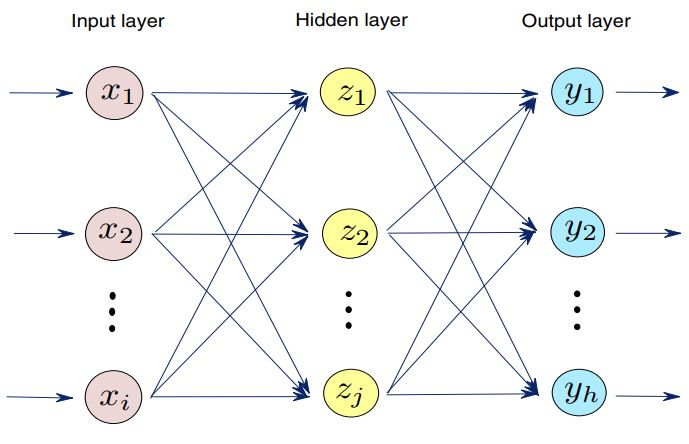

Reference :
 Haiyan Mo, Jun Wang, Hongli Niu, Exponent Back Propagation Neural
Network Forecasting for Financial Cross-Correlation Relationship, Expert Systems With Applications
(2016), doi: 10.1016/j.eswa.2015.12.045


Writing a function to convert input- output- train- test datasets to Tensors (so we can use it with PyTorch):

In [ ]:
def convert_to_tensors(X_train, X_test, y_train, y_test):
  X_train = torch.from_numpy(X_train.to_numpy()).float()
  y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

  X_test = torch.from_numpy(X_test.to_numpy()).float()
  y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

  print(X_train.shape, y_train.shape)
  print(X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [ ]:
class Net(nn.Module):

  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 1)

  def forward(self, x):
    x = torch.sigmoid(self.fc1(x))
    return self.fc2(x)

The plotting function below is written in such a way that it will automatically upload the plots in the drive folder mentioned in section "important links".

In [ ]:
#plotting
def plot_model(model_name,model_idx,X_test_1,y_test_pred,y_test):
  date = X_test_1.index.values
  # Create the pandas DataFrame 
  df2 = pd.DataFrame({'Date':date , 'actual':y_test, 'predicted':y_test_pred })
  fig = px.line(df2.melt(id_vars="Date"), x='Date', y='value', color='variable',
                 labels={
                     "value": "Water level",
                 },
                title= model_name + str(model_idx))
  fig.show()
  plot(fig, filename="/content/gdrive/My Drive/plots_colab/" + model_name + model_idx + ".html", auto_open=False)
  fig2 = px.scatter(df2, x='actual', y='predicted',
                 labels={
                     "actual": "Original Water Level",
                     'predicted' : 'Model Predicted Water Level'
                 },
                title= model_name + model_idx + " original vs model predicted")
  plot(fig2, filename="/content/gdrive/My Drive/plots_colab/original_vs_predicted_values_plots/" + model_name + model_idx + "_original_vs_predicted.html", auto_open=False)

In [ ]:
def plot_epoch_vs_loss(model_name,model_idx,Epoch,epoch_list,train_loss_list) :
  # Create the pandas DataFrame 
  df2 = pd.DataFrame({'Epoch' : epoch_list , 'Train Loss' : train_loss_list })
  fig = px.line(df2, x='Epoch', y='Train Loss', 
                title= model_name + model_idx + " Epoch" + str(Epoch) + " vs Train Loss")
  plot(fig, filename="/content/gdrive/My Drive/plots_colab/epoch_vs_loss_plots/" + model_name + model_idx + "_epoch" + str(Epoch) + "vsloss.html", auto_open=False)

In [ ]:
def train_model(model_idx,Epoch,net,criterion,optimizer,X_train, X_test, y_train, y_test,acc_df) :
  epoch_list = []
  train_loss_list = []
  for epoch in range(Epoch+1):
      
      y_pred = net(X_train)
      
      y_pred = torch.squeeze(y_pred)
      train_loss = criterion(y_pred, y_train)

      epoch_list.append(epoch)
      train_loss_list.append(train_loss.detach().numpy())
      
      if epoch % 100 == 0:
        train_acc = (r2_score(y_train.detach().numpy(), y_pred.detach().numpy()))*100

        y_test_pred = net(X_test)
        y_test_pred = torch.squeeze(y_test_pred)

        test_loss = criterion(y_test_pred, y_test)

        test_acc = (r2_score(y_test.detach().numpy(), y_test_pred.detach().numpy()))*100
        print(f'''epoch {epoch}\nTrain set - loss: {train_loss}, accuracy: {train_acc}\nTest  set - loss: {test_loss}, accuracy: {test_acc}''')
      
      optimizer.zero_grad()
      
      train_loss.backward()
      
      optimizer.step()
  y_test = y_test.detach().numpy()
  y_test_pred = y_test_pred.detach().numpy()
  mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test,y_test_pred)

  #getting input parameters,input days,output days from model index
  inp_param_str,inp_day_str,op_day_str = decrypt_model_index(model_idx)

  df2 = pd.DataFrame([['EBPNN'+model_idx,inp_param_str,inp_day_str,op_day_str,Epoch,mse,mae,evs,r2,mre_score,ncrmse_score]], columns=column_names)
  acc_df = pd.concat([df2, acc_df])

  epoch_list = np.asarray(epoch_list)
  train_loss_list = np.asarray(train_loss_list)
  plot_epoch_vs_loss("EBPNN",model_idx,Epoch,epoch_list,train_loss_list)

  return y_test_pred,acc_df

Training EBPNN with various combinations of input parameters, input days and output days :

In [ ]:
for input_param in range(1,5):  #input_param=1,input_param=2,input_param=3,input_param=4
  for n_steps_in in range(3,6): #n_steps_in=3,n_steps_in=4,n_steps_in=5
    for n_steps_out in range(0,3): #n_steps_out=0,n_steps_out=1,n_steps_out=2
      model_name = "EBPNN"
      model_idx = str(input_param) + "_" + str(n_steps_in) + "_" + str(n_steps_out)
      X = X_dict["input_param_" + str(input_param)]
      Y = Y_dict
      X,Y = split_dataset(X,Y,n_steps_in,n_steps_out)
      X_train, X_test, y_train, y_test = split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date)
      X_test_1 = X_test #ignore this line,this is for plotting later
      X_train, X_test, y_train, y_test = convert_to_tensors(X_train, X_test, y_train, y_test)

      Epoch = 10000
      net = Net(X_train.shape[1])
      criterion = nn.MSELoss()
      optimizer = optim.Adam(net.parameters(), lr=0.001)

      y_test_pred,acc_df = train_model(model_idx,Epoch,net,criterion,optimizer,X_train, X_test, y_train, y_test,acc_df)
      plot_model(model_name,model_idx,X_test_1,y_test_pred,y_test)


torch.Size([7667, 33]) torch.Size([7667])
torch.Size([1305, 33]) torch.Size([1305])
epoch 0
Train set - loss: 60.101375579833984, accuracy: -1644.3812085850218
Test  set - loss: 51.63466262817383, accuracy: -856.0028740923334
epoch 100
Train set - loss: 47.177852630615234, accuracy: -1269.289347173846
Test  set - loss: 40.18416976928711, accuracy: -643.999751067641
epoch 200
Train set - loss: 44.51771545410156, accuracy: -1192.0812766829733
Test  set - loss: 37.82171630859375, accuracy: -600.2595649651741
epoch 300
Train set - loss: 42.02694320678711, accuracy: -1119.7891653777333
Test  set - loss: 35.61463928222656, accuracy: -559.3961368608061
epoch 400
Train set - loss: 39.66539764404297, accuracy: -1051.247698470243
Test  set - loss: 33.52975845336914, accuracy: -520.7949272140063
epoch 500
Train set - loss: 37.41926193237305, accuracy: -986.0557136679982
Test  set - loss: 31.554929733276367, accuracy: -484.2315968203996
epoch 600
Train set - loss: 35.2807502746582, accuracy: -923.

torch.Size([7667, 33]) torch.Size([7667])
torch.Size([1304, 33]) torch.Size([1304])
epoch 0
Train set - loss: 58.13373947143555, accuracy: -1587.2058251160854
Test  set - loss: 50.02286911010742, accuracy: -825.758144394406
epoch 100
Train set - loss: 45.4383659362793, accuracy: -1218.7502819175809
Test  set - loss: 38.63227844238281, accuracy: -614.9560282304102
epoch 200
Train set - loss: 41.61717987060547, accuracy: -1107.8487033403403
Test  set - loss: 35.265193939208984, accuracy: -552.6423256455905
epoch 300
Train set - loss: 38.12876892089844, accuracy: -1006.6051145552331
Test  set - loss: 32.19282913208008, accuracy: -495.7830691922992
epoch 400
Train set - loss: 34.89987564086914, accuracy: -912.8934704777641
Test  set - loss: 29.365339279174805, accuracy: -443.45547660079126
epoch 500
Train set - loss: 31.90642547607422, accuracy: -826.014845310838
Test  set - loss: 26.762144088745117, accuracy: -395.27891403262106
epoch 600
Train set - loss: 29.132680892944336, accuracy: -7

torch.Size([7667, 33]) torch.Size([7667])
torch.Size([1303, 33]) torch.Size([1303])
epoch 0
Train set - loss: 56.18150329589844, accuracy: -1530.4784401615134
Test  set - loss: 49.33603286743164, accuracy: -812.6664535312002
epoch 100
Train set - loss: 44.04891586303711, accuracy: -1178.3709446649952
Test  set - loss: 37.51573944091797, accuracy: -594.0031715647414
epoch 200
Train set - loss: 41.60983657836914, accuracy: -1107.5851022639017
Test  set - loss: 35.31462860107422, accuracy: -553.2846719217589
epoch 300
Train set - loss: 39.27351379394531, accuracy: -1039.7812935036836
Test  set - loss: 33.23235321044922, accuracy: -514.7646509738383
epoch 400
Train set - loss: 37.04100036621094, accuracy: -974.9899754592494
Test  set - loss: 31.25995635986328, accuracy: -478.27758176583586
epoch 500
Train set - loss: 34.91049575805664, accuracy: -913.1594780461068
Test  set - loss: 29.391389846801758, accuracy: -443.71079057816274
epoch 600
Train set - loss: 32.879146575927734, accuracy: -

torch.Size([7667, 44]) torch.Size([7667])
torch.Size([1304, 44]) torch.Size([1304])
epoch 0
Train set - loss: 56.77237319946289, accuracy: -1547.6953767855498
Test  set - loss: 49.29701232910156, accuracy: -812.3251115967946
epoch 100
Train set - loss: 43.9714241027832, accuracy: -1176.1753366553642
Test  set - loss: 37.37151336669922, accuracy: -591.6236266221633
epoch 200
Train set - loss: 40.34563064575195, accuracy: -1070.944602466713
Test  set - loss: 34.15339660644531, accuracy: -532.0667095542727
epoch 300
Train set - loss: 36.968563079833984, accuracy: -972.9322853481013
Test  set - loss: 31.178735733032227, accuracy: -477.0154304597673
epoch 400
Train set - loss: 33.827056884765625, accuracy: -881.7570122202438
Test  set - loss: 28.43227195739746, accuracy: -426.1877352133603
epoch 500
Train set - loss: 30.90918731689453, accuracy: -797.0724462469387
Test  set - loss: 25.90082550048828, accuracy: -379.3386587885103
epoch 600
Train set - loss: 28.203872680664062, accuracy: -718

torch.Size([7667, 44]) torch.Size([7667])
torch.Size([1303, 44]) torch.Size([1303])
epoch 0
Train set - loss: 49.13109588623047, accuracy: -1325.86477842024
Test  set - loss: 41.960689544677734, accuracy: -676.2302515335296
epoch 100
Train set - loss: 41.15699768066406, accuracy: -1094.4428417352467
Test  set - loss: 34.879337310791016, accuracy: -545.2324209101016
epoch 200
Train set - loss: 36.60661697387695, accuracy: -962.3834386493027
Test  set - loss: 30.87337303161621, accuracy: -471.12605227422375
epoch 300
Train set - loss: 32.47374725341797, accuracy: -842.4408462949154
Test  set - loss: 27.268394470214844, accuracy: -404.4375937674526
epoch 400
Train set - loss: 28.736724853515625, accuracy: -733.9864900528561
Test  set - loss: 24.042160034179688, accuracy: -344.75555548074357
epoch 500
Train set - loss: 25.371191024780273, accuracy: -636.3133125089341
Test  set - loss: 21.170076370239258, accuracy: -291.62486668660904
epoch 600
Train set - loss: 22.3527774810791, accuracy: 

torch.Size([7667, 44]) torch.Size([7667])
torch.Size([1302, 44]) torch.Size([1302])
epoch 0
Train set - loss: 44.284698486328125, accuracy: -1185.1531308742162
Test  set - loss: 37.28190612792969, accuracy: -589.4023488780235
epoch 100
Train set - loss: 36.43518829345703, accuracy: -957.358724774527
Test  set - loss: 30.737396240234375, accuracy: -468.3838996623798
epoch 200
Train set - loss: 33.11831283569336, accuracy: -861.1017287329743
Test  set - loss: 27.84174346923828, accuracy: -414.83840204189954
epoch 300
Train set - loss: 30.083919525146484, accuracy: -773.0431236155694
Test  set - loss: 25.213899612426758, accuracy: -366.24545384450784
epoch 400
Train set - loss: 27.296106338500977, accuracy: -692.139911306968
Test  set - loss: 22.820589065551758, accuracy: -321.9893863822862
epoch 500
Train set - loss: 24.735626220703125, accuracy: -617.8340940723621
Test  set - loss: 20.643354415893555, accuracy: -281.7287399036932
epoch 600
Train set - loss: 22.38756561279297, accuracy: 

torch.Size([7667, 55]) torch.Size([7667])
torch.Size([1303, 55]) torch.Size([1303])
epoch 0
Train set - loss: 64.91183471679688, accuracy: -1783.8467381153962
Test  set - loss: 55.98480224609375, accuracy: -935.6621050614823
epoch 100
Train set - loss: 49.95475387573242, accuracy: -1349.767921083408
Test  set - loss: 42.708621978759766, accuracy: -690.0659869377255
epoch 200
Train set - loss: 47.227394104003906, accuracy: -1270.6155441813394
Test  set - loss: 40.26991653442383, accuracy: -644.9526238062566
epoch 300
Train set - loss: 42.0621223449707, accuracy: -1120.7112014255679
Test  set - loss: 35.677860260009766, accuracy: -560.0041050001594
epoch 400
Train set - loss: 37.743309020996094, accuracy: -995.3720811815698
Test  set - loss: 31.851797103881836, accuracy: -489.22584868873093
epoch 500
Train set - loss: 31.531476974487305, accuracy: -815.0945251537905
Test  set - loss: 26.45042610168457, accuracy: -389.3059712323887
epoch 600
Train set - loss: 27.06837272644043, accuracy: 

torch.Size([7667, 55]) torch.Size([7667])
torch.Size([1302, 55]) torch.Size([1302])
epoch 0
Train set - loss: 65.87557983398438, accuracy: -1811.7260114915464
Test  set - loss: 56.90811538696289, accuracy: -952.3222997709638
epoch 100
Train set - loss: 49.36528015136719, accuracy: -1332.5926507733188
Test  set - loss: 42.19810104370117, accuracy: -680.3107136380947
epoch 200
Train set - loss: 46.76462936401367, accuracy: -1257.1214831751133
Test  set - loss: 39.8745002746582, accuracy: -637.3435895203046
epoch 300
Train set - loss: 44.266014099121094, accuracy: -1184.610970107941
Test  set - loss: 37.649925231933594, accuracy: -596.2076452854295
epoch 400
Train set - loss: 41.87175369262695, accuracy: -1115.1289379917016
Test  set - loss: 35.52620315551758, accuracy: -556.9364846376467
epoch 500
Train set - loss: 39.58016586303711, accuracy: -1048.62649277068
Test  set - loss: 33.50151062011719, accuracy: -519.4969023052392
epoch 600
Train set - loss: 37.38864517211914, accuracy: -985.

torch.Size([7667, 55]) torch.Size([7667])
torch.Size([1301, 55]) torch.Size([1301])
epoch 0
Train set - loss: 40.891075134277344, accuracy: -1086.6104893785543
Test  set - loss: 34.68507766723633, accuracy: -541.1328551219062
epoch 100
Train set - loss: 30.511089324951172, accuracy: -785.3955020790054
Test  set - loss: 25.597314834594727, accuracy: -373.15105563729486
epoch 200
Train set - loss: 25.714143753051758, accuracy: -646.1941823138336
Test  set - loss: 21.486356735229492, accuracy: -297.16245828226243
epoch 300
Train set - loss: 21.635156631469727, accuracy: -527.8266515289408
Test  set - loss: 18.051454544067383, accuracy: -233.67029689285565
epoch 400
Train set - loss: 18.163774490356445, accuracy: -427.0911369299948
Test  set - loss: 15.187921524047852, accuracy: -180.7397434822276
epoch 500
Train set - loss: 15.22872257232666, accuracy: -341.9195084883806
Test  set - loss: 12.825714111328125, accuracy: -137.07561975513985
epoch 600
Train set - loss: 12.769197463989258, acc

## 2.MLP
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation); see § Terminology. Multilayer perceptrons are sometimes colloquially referred to as "vanilla" neural networks, especially when they have a single hidden layer.

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.
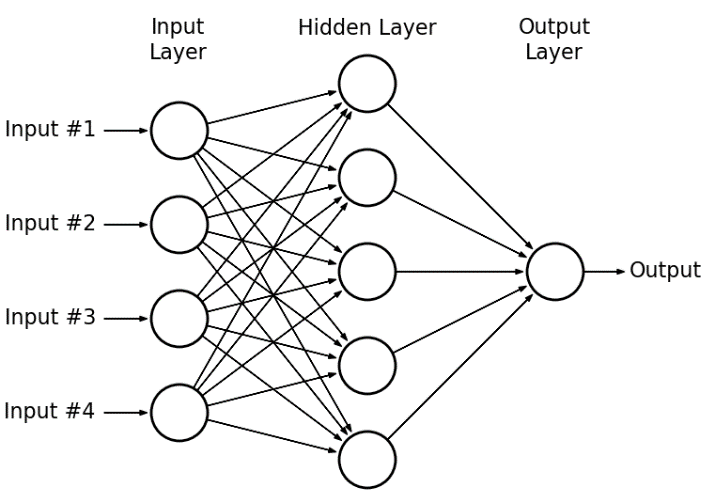

Reference :
https://en.wikipedia.org/wiki/Multilayer_perceptron

In [ ]:
def train_mlp_model(model_idx,Epoch,X,Y,n_steps_in,n_steps_out,acc_df):
    model_name = "MLP"
    X,Y = split_dataset(X,Y,n_steps_in,n_steps_out)

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date)

    #Initializing the MLPRegressor
    reg = MLPRegressor(hidden_layer_sizes=(300,150), max_iter=Epoch,activation ='relu',solver='adam',random_state=1)

    #Train the model using the training sets
    reg.fit(X_train,y_train)

    #Import scikit-learn metrics module for accuracy calculation
    print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")

    plot_df = pd.DataFrame(reg.loss_curve_)
    fig = px.line(plot_df,x = plot_df.index, y = 0,
                title= model_name + str(model_idx) + " Epoch" + str(Epoch) + " vs Train Loss")
    plot(fig, filename="/content/gdrive/My Drive/plots_colab/epoch_vs_loss_plots/" + model_name + str(model_idx) + "_epoch" + str(Epoch) + "vsloss.html", auto_open=False)

    #get predicted values
    y_test_pred = reg.predict(X_test)
    y_test_array = y_test.values.ravel() # converting dataframe to 1d array

    
    mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test_array,y_test_pred)
    
    #getting input parameters,input days,output days from model index
    inp_param_str,inp_day_str,op_day_str = decrypt_model_index(model_idx)

    df2 = pd.DataFrame([[model_name+model_idx,inp_param_str,inp_day_str,op_day_str,Epoch,mse,mae,evs,r2,mre_score,ncrmse_score]], columns=column_names)
    acc_df = pd.concat([df2, acc_df])

    plot_model(model_name,model_idx,X_test,y_test_pred,y_test_array)

    return acc_df

Training MLP with various combinations of input parameters, input days and output days :

In [ ]:
for input_param in range(1,5):  #input_param=1,input_param=2,input_param=3,input_param=4
  for n_steps_in in range(3,6): #n_steps_in=3,n_steps_in=4,n_steps_in=5
    for n_steps_out in range(0,3): #n_steps_out=0,n_steps_out=1,n_steps_out=2
      model_idx = str(input_param) + "_" + str(n_steps_in) + "_" + str(n_steps_out)
      X = X_dict["input_param_" + str(input_param)]
      Y = Y_dict
      Epoch = 300
      acc_df = train_mlp_model(model_idx,Epoch,X,Y,n_steps_in,n_steps_out,acc_df)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  97.46309228831251 %


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  96.58728338532482 %


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  89.59825593427686 %


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  94.71796917038056 %


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  93.54822145863044 %


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  93.66532163987408 %


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  92.84692218701731 %


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  96.00237541918307 %


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  95.18140751949653 %


## 3.Support Vector Regression
SVR is an extension of the well-known SVM algorithm  applied in multivariate regression problems. As SVM, the SVR contains the main features that characterize the maximum margin algorithm. Nevertheless, there are important differences with respect to SVM that must be considered. SVR looks for a feasible solution by individualizing the hyperplane that maximizes the margin. Nevertheless, since the final solution is a real number that needs to be predicted, the tolerance of the error is more flexible. On the contrary to what it can be thought, SVR can be performed in a linear or nonlinear manner, depending on what is known as the “kernel-trick.”

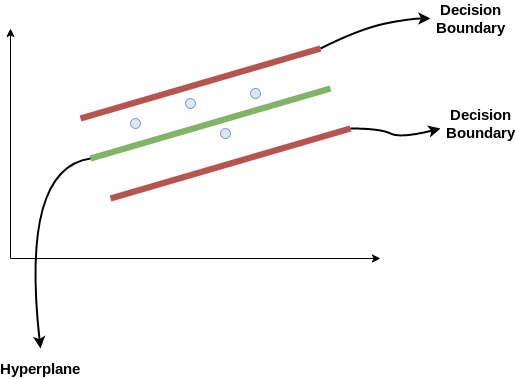

References :


1.   https://www.sciencedirect.com/science/article/pii/B9780444639776000109
2.   https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/



Training SVR and SVR with radial kernel with various combinations of input parameters, input days and output days :

In [ ]:
for input_param in range(1,5):  #input_param=1,input_param=2,input_param=3,input_param=4
  for n_steps_in in range(3,6): #n_steps_in=3,n_steps_in=4,n_steps_in=5
    for n_steps_out in range(0,3): #n_steps_out=0,n_steps_out=1,n_steps_out=2
      model_name= "SVR"
      model_idx = str(input_param) + "_" + str(n_steps_in) + "_" + str(n_steps_out)
      X = X_dict["input_param_" + str(input_param)]
      Y = Y_dict
      X,Y = split_dataset(X,Y,n_steps_in,n_steps_out)

      # Split dataset into training set and test set
      X_train, X_test, y_train, y_test = split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date)
      reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
      reg.fit(X_train, y_train)
      print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")
      
      #get predicted values
      y_test_pred = reg.predict(X_test)
      y_test_array = y_test.values.ravel() # converting dataframe to 1d array
      mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test_array,y_test_pred)#getting input parameters,input days,output days from model index
      inp_param_str,inp_day_str,op_day_str = decrypt_model_index(model_idx)

      df2 = pd.DataFrame([[model_name+model_idx,inp_param_str,inp_day_str,op_day_str,"#N/A",mse,mae,evs,r2,mre_score,ncrmse_score]], columns=column_names)
      acc_df = pd.concat([df2, acc_df])

      plot_model(model_name,model_idx,X_test,y_test_pred,y_test_array)
      #Support Vector Regression - radial
      model_name= "SVR_radial"
      reg = SVR(kernel='rbf')
      reg.fit(X_train, y_train)
      print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")

      #get predicted values
      y_test_pred = reg.predict(X_test)
      y_test_array = y_test.values.ravel() # converting dataframe to 1d array
      mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test_array,y_test_pred)
      df2 = pd.DataFrame([[model_name+model_idx,inp_param_str,inp_day_str,op_day_str,"#N/A",mse,mae,evs,r2,mre_score,ncrmse_score]], columns=column_names)
      acc_df = pd.concat([df2, acc_df])
      plot_model(model_name,model_idx,X_test,y_test_pred,y_test_array)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  95.23214753459443 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  96.99762063826364 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  94.31386005187137 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  95.50024742030831 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  92.95851877623878 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  93.64998519716605 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  95.0008763332937 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  96.60976439166541 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  94.09530059563973 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  95.14654243341599 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  92.77909300368327 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  93.31113109276889 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  94.8423083935033 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  96.30529601127316 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  93.94333293451564 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  94.82263974963385 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  92.65132386076844 %


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of model :  92.95289332422205 %


Observation : Support Vector Regression with linear kernel does not work.

## 4.Decision Tree Regression/CART
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

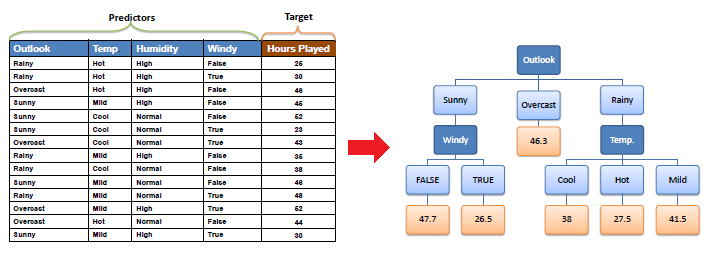

Reference :
https://www.saedsayad.com/decision_tree_reg.htm

Classification and regression trees (CART) are a non-parametric decision tree learning technique that produces either classification or regression trees, depending on whether the dependent variable is categorical or numeric, respectively. Scikit-learn uses an optimised version of the CART algorithm.

In [ ]:
def train_dtr_model(model_idx,X,Y,n_steps_in,n_steps_out,acc_df) :
  model_name = "DTR"

  X,Y = split_dataset(X,Y,n_steps_in,n_steps_out)
  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date)
  reg = tree.DecisionTreeRegressor()
  reg.fit(X_train, y_train)
  print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")

  #get predicted values
  y_test_pred = reg.predict(X_test)
  y_test_array = y_test.values.ravel() # converting dataframe to 1d array
  mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test_array,y_test_pred)

  inp_param_str,inp_day_str,op_day_str = decrypt_model_index(model_idx)
  
  df2 = pd.DataFrame([[model_name+model_idx,inp_param_str,inp_day_str,op_day_str,"#N/A",mse,mae,evs,r2,mre_score,ncrmse_score]], columns=column_names)
  acc_df = pd.concat([df2, acc_df])
  plot_model(model_name,model_idx,X_test,y_test_pred,y_test_array)

  return acc_df

Training DTR with various combinations of input parameters, input days and output days :

In [ ]:
for input_param in range(1,5):  #input_param=1,input_param=2,input_param=3,input_param = 4
  for n_steps_in in range(3,6): #n_steps_in=3,n_steps_in=4,n_steps_in=5
    for n_steps_out in range(0,3): #n_steps_out=0,n_steps_out=1,n_steps_out=2
      model_idx = str(input_param) + "_" + str(n_steps_in) + "_" + str(n_steps_out)
      X = X_dict["input_param_" + str(input_param)]
      Y = Y_dict
      acc_df = train_dtr_model(model_idx,X,Y,n_steps_in,n_steps_out,acc_df)

Accuracy of model :  95.4976497459506 %


Accuracy of model :  91.45354951471822 %


Accuracy of model :  84.12125514408308 %


Accuracy of model :  95.81699218399518 %


Accuracy of model :  91.76851595012535 %


Accuracy of model :  86.51566709079425 %


Accuracy of model :  94.89178070000237 %


Accuracy of model :  91.34086864986043 %


Accuracy of model :  86.77400613654122 %


## 5.Xgboost

XGBoost is short for Extreme Gradient Boosting and is an efficient implementation of the stochastic gradient boosting machine learning algorithm.

The stochastic gradient boosting algorithm, also called gradient boosting machines or tree boosting, is a powerful machine learning technique that performs well or even best on a wide range of challenging machine learning problems.

Tree boosting has been shown to give state-of-the-art results on many standard classification benchmarks.

— XGBoost: A Scalable Tree Boosting System, 2016.

It is an ensemble of decision trees algorithm where new trees fix errors of those trees that are already part of the model. Trees are added until no further improvements can be made to the model.

Reference :
https://xgboost.readthedocs.io/en/latest/tutorials/model.html

In [ ]:
from xgboost import XGBRegressor

In [ ]:
def train_xgb_model(model_idx,X,Y,n_steps_in,n_steps_out,acc_df) :
  model_name = "XGB"

  X,Y = split_dataset(X,Y,n_steps_in,n_steps_out)
  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date)
  reg = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
  reg.fit(X_train, y_train)
  print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")

  #get predicted values
  y_test_pred = reg.predict(X_test)
  y_test_array = y_test.values.ravel() # converting dataframe to 1d array
  mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test_array,y_test_pred)
  inp_param_str,inp_day_str,op_day_str = decrypt_model_index(model_idx)
  
  df2 = pd.DataFrame([[model_name+model_idx,inp_param_str,inp_day_str,op_day_str,"#N/A",mse,mae,evs,r2,mre_score,ncrmse_score]], columns=column_names)
  acc_df = pd.concat([df2, acc_df])
  plot_model(model_name,model_idx,X_test,y_test_pred,y_test_array)

  return acc_df

Training XGB with various combinations of input parameters, input days and output days :

In [ ]:
for input_param in range(1,5):  #input_param=1,input_param=2,input_param=3,input_param = 4
  for n_steps_in in range(3,6): #n_steps_in=3,n_steps_in=4,n_steps_in=5
    for n_steps_out in range(0,3): #n_steps_out=0,n_steps_out=1,n_steps_out=2
      model_idx = str(input_param) + "_" + str(n_steps_in) + "_" + str(n_steps_out)
      X = X_dict["input_param_" + str(input_param)]
      Y = Y_dict
      acc_df = train_xgb_model(model_idx,X,Y,n_steps_in,n_steps_out,acc_df)

Accuracy of model :  96.75302989110334 %


Accuracy of model :  95.02721870544501 %


Accuracy of model :  93.1878567857379 %


Accuracy of model :  96.66762326128395 %


Accuracy of model :  94.87920545307465 %


Accuracy of model :  92.37725156507719 %


Accuracy of model :  96.65516651342436 %


Accuracy of model :  94.53857340678987 %


Accuracy of model :  91.98216772455557 %


##6.Prophet
Source : https://research.fb.com/prophet-forecasting-at-scale/


Reference : https://www.kaggle.com/janiobachmann/s-p-500-time-series-forecasting-with-prophet
https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet

# Where Prophet shines
Not all forecasting problems can be solved by the same procedure. Prophet is optimized for the business forecast tasks we have encountered at Facebook, which typically have any of the following characteristics:

hourly, daily, or weekly observations with at least a few months (preferably a year) of history
strong multiple “human-scale” seasonalities: day of week and time of year
important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl)
a reasonable number of missing observations or large outliers
historical trend changes, for instance due to product launches or logging changes
trends that are non-linear growth curves, where a trend hits a natural limit or saturates.

# How Prophet works
At its core, the Prophet procedure is an additive regression model with four main components:

1.   A piecewise linear or logistic growth curve trend. 
2.   Prophet automatically detects changes in trends by selecting changepoints from the data.
3. A yearly seasonal component modeled using Fourier series.
4. A weekly seasonal component using dummy variables.
A user-provided list of important holidays.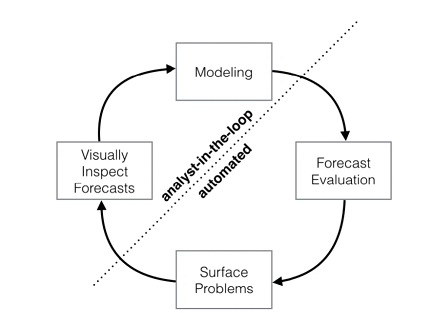



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots



In [ ]:
def train_Prophet_Model(model_idx,X, Y, n_steps_in, n_steps_out,acc_df):
  model_name = "Prophet"
  X,Y = split_dataset(X,Y,n_steps_in,n_steps_out)

  #Prophet Model trains on a dataframe based on the column ds which contains the datetime and always treats the 'y' column as output
  X['ds'] = X.index
  X['y'] = Y
  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date)

  #Just for safety. Dropping the index 
  X_train.reset_index(drop = True, inplace = True)
  X_test.reset_index(drop = True, inplace = True)
  X_test = X_test.drop(['y'], axis = 1)

  model = Prophet()

  #Prophet trains on the column y based on the column ds. If we have other features, we need to add them.
  for col in X_train.columns:
    if col == 'ds' or col == 'y':
      continue
    model.add_regressor(col)

  model.fit(X_train)

  #Prophet predicts a lot of trends in the output 
  forecast = model.predict(X_test)
  print("Forecast: ")
  print(forecast.head())

  #get predicted values
  y_test_pred = forecast['yhat']
  y_test_array = y_test.values.ravel() # converting dataframe to 1d array

  mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test_array,y_test_pred)
  inp_param_str,inp_day_str,op_day_str = decrypt_model_index(model_idx)
  
  df2 = pd.DataFrame([[model_name+model_idx,inp_param_str,inp_day_str,op_day_str,"#N/A",mse,mae,evs,r2,mre_score,ncrmse_score]], columns=column_names)
  acc_df = pd.concat([df2, acc_df])
  plot_model(model_name,model_idx,X_test,y_test_pred,y_test_array)

  return acc_df

Training Prophet with various combinations of input parameters, input days and output days :

In [ ]:
for input_param in range(1,4):  #input_param=1,input_param=2,input_param=3
  for n_steps_in in range(3,6): #n_steps_in=3,n_steps_in=4,n_steps_in=5
    for n_steps_out in range(0,3): #n_steps_out=0,n_steps_out=1,n_steps_out=2
      model_idx = str(input_param) + "_" + str(n_steps_in) + "_" + str(n_steps_out)
      X = X_dict["input_param_" + str(input_param)]
      Y = Y_dict

      acc_df = train_Prophet_Model(model_idx,X, Y, n_steps_in, n_steps_out,acc_df)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.952538  ...                         0.0  4.913132
1 2016-01-02  6.952519  ...                         0.0  4.903637
2 2016-01-03  6.952500  ...                         0.0  4.903854
3 2016-01-04  6.952481  ...                         0.0  4.879475
4 2016-01-05  6.952462  ...                         0.0  4.885873

[5 rows x 85 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.939172  ...                         0.0  4.911578
1 2016-01-02  6.939132  ...                         0.0  4.912200
2 2016-01-03  6.939091  ...                         0.0  4.900970
3 2016-01-04  6.939051  ...                         0.0  4.888331
4 2016-01-05  6.939010  ...                         0.0  4.893104

[5 rows x 85 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.930162  ...                         0.0  4.925624
1 2016-01-02  6.930104  ...                         0.0  4.915450
2 2016-01-03  6.930046  ...                         0.0  4.915501
3 2016-01-04  6.929988  ...                         0.0  4.900695
4 2016-01-05  6.929931  ...                         0.0  4.901869

[5 rows x 85 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.953338  ...                         0.0  4.903611
1 2016-01-02  6.953320  ...                         0.0  4.904101
2 2016-01-03  6.953302  ...                         0.0  4.879575
3 2016-01-04  6.953285  ...                         0.0  4.885871
4 2016-01-05  6.953267  ...                         0.0  4.869098

[5 rows x 106 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.941691  ...                         0.0  4.912946
1 2016-01-02  6.941653  ...                         0.0  4.902222
2 2016-01-03  6.941615  ...                         0.0  4.889483
3 2016-01-04  6.941578  ...                         0.0  4.893937
4 2016-01-05  6.941540  ...                         0.0  4.873303

[5 rows x 106 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.932779  ...                         0.0  4.915652
1 2016-01-02  6.932724  ...                         0.0  4.916173
2 2016-01-03  6.932670  ...                         0.0  4.901342
3 2016-01-04  6.932615  ...                         0.0  4.902091
4 2016-01-05  6.932560  ...                         0.0  4.882222

[5 rows x 106 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.954325  ...                         0.0  4.904672
1 2016-01-02  6.954308  ...                         0.0  4.880160
2 2016-01-03  6.954291  ...                         0.0  4.886645
3 2016-01-04  6.954274  ...                         0.0  4.869729
4 2016-01-05  6.954257  ...                         0.0  4.844056

[5 rows x 127 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.943526  ...                         0.0  4.903162
1 2016-01-02  6.943490  ...                         0.0  4.890304
2 2016-01-03  6.943455  ...                         0.0  4.895084
3 2016-01-04  6.943420  ...                         0.0  4.874263
4 2016-01-05  6.943384  ...                         0.0  4.848459

[5 rows x 127 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.933800  ...                         0.0  4.916293
1 2016-01-02  6.933746  ...                         0.0  4.900695
2 2016-01-03  6.933692  ...                         0.0  4.902178
3 2016-01-04  6.933638  ...                         0.0  4.882121
4 2016-01-05  6.933584  ...                         0.0  4.854457

[5 rows x 127 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.958804  ...                         0.0  4.893321
1 2016-01-02  6.958798  ...                         0.0  4.887063
2 2016-01-03  6.958791  ...                         0.0  4.852227
3 2016-01-04  6.958785  ...                         0.0  4.863376
4 2016-01-05  6.958779  ...                         0.0  4.862723

[5 rows x 193 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.950027  ...                         0.0  4.912068
1 2016-01-02  6.950012  ...                         0.0  4.880058
2 2016-01-03  6.949996  ...                         0.0  4.824247
3 2016-01-04  6.949980  ...                         0.0  4.855244
4 2016-01-05  6.949965  ...                         0.0  4.847318

[5 rows x 193 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.939551  ...                         0.0  4.943537
1 2016-01-02  6.939521  ...                         0.0  4.874701
2 2016-01-03  6.939491  ...                         0.0  4.814845
3 2016-01-04  6.939461  ...                         0.0  4.873126
4 2016-01-05  6.939431  ...                         0.0  4.845062

[5 rows x 193 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.957943  ...                         0.0  4.907201
1 2016-01-02  6.957936  ...                         0.0  4.863546
2 2016-01-03  6.957929  ...                         0.0  4.867231
3 2016-01-04  6.957922  ...                         0.0  4.862315
4 2016-01-05  6.957915  ...                         0.0  4.880981

[5 rows x 250 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.947932  ...                         0.0  4.920352
1 2016-01-02  6.947914  ...                         0.0  4.843563
2 2016-01-03  6.947897  ...                         0.0  4.859444
3 2016-01-04  6.947880  ...                         0.0  4.862676
4 2016-01-05  6.947863  ...                         0.0  4.918733

[5 rows x 250 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.936057  ...                         0.0  4.938046
1 2016-01-02  6.936025  ...                         0.0  4.828559
2 2016-01-03  6.935992  ...                         0.0  4.889501
3 2016-01-04  6.935960  ...                         0.0  4.868773
4 2016-01-05  6.935928  ...                         0.0  4.953561

[5 rows x 250 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.957941  ...                         0.0  4.875963
1 2016-01-02  6.957934  ...                         0.0  4.864970
2 2016-01-03  6.957927  ...                         0.0  4.859978
3 2016-01-04  6.957920  ...                         0.0  4.893573
4 2016-01-05  6.957914  ...                         0.0  4.948197

[5 rows x 307 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.945491  ...                         0.0  4.874601
1 2016-01-02  6.945472  ...                         0.0  4.847176
2 2016-01-03  6.945453  ...                         0.0  4.866917
3 2016-01-04  6.945434  ...                         0.0  4.937011
4 2016-01-05  6.945414  ...                         0.0  5.074437

[5 rows x 307 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.931805  ...                         0.0  4.873975
1 2016-01-02  6.931768  ...                         0.0  4.878955
2 2016-01-03  6.931732  ...                         0.0  4.878140
3 2016-01-04  6.931695  ...                         0.0  4.958235
4 2016-01-05  6.931658  ...                         0.0  5.177179

[5 rows x 307 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.954659  ...                         0.0  4.908598
1 2016-01-02  6.954647  ...                         0.0  4.907214
2 2016-01-03  6.954634  ...                         0.0  4.885036
3 2016-01-04  6.954622  ...                         0.0  4.878746
4 2016-01-05  6.954609  ...                         0.0  4.884786

[5 rows x 247 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.945163  ...                         0.0  4.934592
1 2016-01-02  6.945139  ...                         0.0  4.916238
2 2016-01-03  6.945115  ...                         0.0  4.875896
3 2016-01-04  6.945091  ...                         0.0  4.876625
4 2016-01-05  6.945066  ...                         0.0  4.884908

[5 rows x 247 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.934458  ...                         0.0  4.970473
1 2016-01-02  6.934418  ...                         0.0  4.913487
2 2016-01-03  6.934378  ...                         0.0  4.873615
3 2016-01-04  6.934338  ...                         0.0  4.896359
4 2016-01-05  6.934298  ...                         0.0  4.888870

[5 rows x 247 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.955740  ...                         0.0  4.922331
1 2016-01-02  6.955730  ...                         0.0  4.894111
2 2016-01-03  6.955719  ...                         0.0  4.877204
3 2016-01-04  6.955708  ...                         0.0  4.882145
4 2016-01-05  6.955697  ...                         0.0  4.886012

[5 rows x 322 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.944308  ...                         0.0  4.952732
1 2016-01-02  6.944283  ...                         0.0  4.889027
2 2016-01-03  6.944259  ...                         0.0  4.875853
3 2016-01-04  6.944234  ...                         0.0  4.896727
4 2016-01-05  6.944210  ...                         0.0  4.924914

[5 rows x 322 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.932040  ...                         0.0  4.974758
1 2016-01-02  6.931999  ...                         0.0  4.881530
2 2016-01-03  6.931959  ...                         0.0  4.907085
3 2016-01-04  6.931919  ...                         0.0  4.908856
4 2016-01-05  6.931878  ...                         0.0  4.961593

[5 rows x 322 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.955351  ...                         0.0  4.905292
1 2016-01-02  6.955340  ...                         0.0  4.875253
2 2016-01-03  6.955329  ...                         0.0  4.878872
3 2016-01-04  6.955318  ...                         0.0  4.900625
4 2016-01-05  6.955307  ...                         0.0  4.919735

[5 rows x 397 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.941763  ...                         0.0  4.920893
1 2016-01-02  6.941736  ...                         0.0  4.862146
2 2016-01-03  6.941710  ...                         0.0  4.899706
3 2016-01-04  6.941684  ...                         0.0  4.946231
4 2016-01-05  6.941657  ...                         0.0  5.018335

[5 rows x 397 columns]


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2016-01-01  6.928592  ...                         0.0  4.934294
1 2016-01-02  6.928548  ...                         0.0  4.902633
2 2016-01-03  6.928505  ...                         0.0  4.916130
3 2016-01-04  6.928461  ...                         0.0  4.974930
4 2016-01-05  6.928417  ...                         0.0  5.114539

[5 rows x 397 columns]


# RENEWED PROPHET MODEL

In [ ]:
model_name = "v2_Prophet"

def Train_Prophet(X,Y,idx,acc_df):
  #Prophet Model trains on a dataframe based on the column ds which contains the datetime and always treats the 'y' column as output
  X['ds'] = X.index
  X.rename(columns = {'Wlavg-36': 'y'}, inplace = True)

  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date)

  #Just for safety. Dropping the index 
  X_train.reset_index(drop = True, inplace = True)
  X_test.reset_index(drop = True, inplace = True)
  X_test = X_test.drop(['y'], axis = 1)

  print("X_train",X_train.head())

  model = Prophet()

  for col in X_train.columns:
      if col == 'ds' or col == 'y':
        continue
      model.add_regressor(col)

  model.fit(X_train)
  model_idx = str(idx)
  #print(model_idx)

  #Prophet predicts a lot of trends in the output 
  forecast = model.predict(X_test)
  print("Forecast: ")
  print(forecast.head())

  #get predicted values
  y_test_pred = forecast['yhat']
  y_test_array = y_test.values.ravel() # converting dataframe to 1d array

  mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test_array,y_test_pred)
  inp_param_str,inp_day_str,op_day_str = decrypt_model_index(model_idx+"_-1_-1")
  
  df2 = pd.DataFrame([[model_name+model_idx,inp_param_str,"#N/A","#N/A","#N/A",mse,mae,evs,r2,mre_score,ncrmse_score]], columns=column_names)
  acc_df = pd.concat([df2, acc_df])
  plot_model(model_name,model_idx,X_test,y_test_pred,y_test_array)
  return acc_df

In [ ]:
Y = Y_dict
string = ["input_param_1","input_param_2","input_param_3"]
for i in range(3):
  X = X_dict[string[i]]
  acc_df = Train_Prophet(X,Y,i+1,acc_df) #i+1, since i starts from 0 and i+1 indicates the input_param_no

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


X_train        y  PRECTOT1  PRECTOT2  PRECTOT3  PRECTOT4  PRECTOT5  PRECTOT6         ds
0  5.024       0.0       0.0      0.00      0.00      0.00      0.00 1996-01-01
1  4.994       0.0       0.0      0.00      0.00      0.00      0.00 1996-01-02
2  4.974       0.0       0.0      0.00      0.00      0.01      0.00 1996-01-03
3  4.946       0.0       0.0      0.01      0.01      0.02      0.01 1996-01-04
4  4.916       0.0       0.0      0.00      0.00      0.00      0.00 1996-01-05
Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2017-01-01  6.492612  ...                         0.0  5.108611
1 2017-01-02  6.492139  ...                         0.0  5.089436
2 2017-01-03  6.491665  ...                         0.0  5.077343
3 2017-01-04  6.491192  ...                         0.0  5.061541
4 2017-01-05  6.490719  ...                         0.0  5.044340

[5 rows x 40 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


X_train        y  RH2M1  T2M_MAX1  WS10M1  ...  RH2M6  T2M_MAX6  WS10M6         ds
0  5.024  60.11     26.27    2.50  ...  73.08     23.47    1.58 1996-01-01
1  4.994  60.16     26.41    2.61  ...  72.78     23.62    1.80 1996-01-02
2  4.974  56.95     27.22    2.28  ...  68.25     24.17    1.71 1996-01-03
3  4.946  65.77     21.82    2.38  ...  69.34     21.49    1.56 1996-01-04
4  4.916  63.31     25.30    2.03  ...  73.67     22.70    1.27 1996-01-05

[5 rows x 20 columns]
Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2017-01-01  6.540644  ...                         0.0  5.012917
1 2017-01-02  6.540218  ...                         0.0  5.026522
2 2017-01-03  6.539792  ...                         0.0  5.096853
3 2017-01-04  6.539366  ...                         0.0  5.176564
4 2017-01-05  6.538940  ...                         0.0  5.080838

[5 rows x 76 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


X_train        y  PRECTOT1  RH2M1  T2M_MAX1  ...  RH2M6  T2M_MAX6  WS10M6         ds
0  5.024       0.0  60.11     26.27  ...  73.08     23.47    1.58 1996-01-01
1  4.994       0.0  60.16     26.41  ...  72.78     23.62    1.80 1996-01-02
2  4.974       0.0  56.95     27.22  ...  68.25     24.17    1.71 1996-01-03
3  4.946       0.0  65.77     21.82  ...  69.34     21.49    1.56 1996-01-04
4  4.916       0.0  63.31     25.30  ...  73.67     22.70    1.27 1996-01-05

[5 rows x 26 columns]
Forecast: 
          ds     trend  ...  multiplicative_terms_upper      yhat
0 2017-01-01  6.522105  ...                         0.0  4.994254
1 2017-01-02  6.521665  ...                         0.0  5.014888
2 2017-01-03  6.521226  ...                         0.0  5.089501
3 2017-01-04  6.520786  ...                         0.0  5.165020
4 2017-01-05  6.520347  ...                         0.0  5.071436

[5 rows x 94 columns]



# Forecasting Horizon vs Accuracy plots for Xgboost and Prophet


function for plotting forecasting horizon vs accuracy for any model :

In [ ]:
def plot_fh_vs_acc(model_name,input_param,n_steps_in,no_of_days,X_dict,Y_dict,train_start_date,train_end_date,test_start_date,test_end_date):
  accuracy_data = []
  forecasting_horizon = []
  for n_steps_out in range(0,no_of_days+1):
    X = X_dict["input_param_" + str(input_param)]
    Y = Y_dict
    model_idx = str(input_param) + "_" + str(n_steps_in) + "_" + str(n_steps_out)

    X,Y = split_dataset(X,Y,n_steps_in,n_steps_out)
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = split_train_test_data(X,Y,train_start_date,train_end_date,test_start_date,test_end_date)
    reg = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    reg.fit(X_train, y_train)
    print("Accuracy of model : ",reg.score(X_test, y_test)*100,"%")

    #get predicted values
    y_test_pred = reg.predict(X_test)
    y_test_array = y_test.values.ravel() # converting dataframe to 1d array
    mse,mae,evs,r2,mre_score,ncrmse_score = evaluate_performance(y_test_array,y_test_pred)
    inp_param_str,inp_day_str,op_day_str = decrypt_model_index(model_idx)

    accuracy_data.append(r2*100)
    forecasting_horizon.append(n_steps_out)

  accuracy_data = np.asarray(accuracy_data)
  forecasting_horizon = np.asarray(forecasting_horizon)
  fig = plt.figure(figsize=((no_of_days/2),6),dpi=100)
  ax = plt.axes()
  ax.plot(forecasting_horizon,accuracy_data,color="navy",linewidth=3)
  curve = ml.Line2D(forecasting_horizon,accuracy_data,color="navy",linewidth=3,linestyle='-')
  pts = ax.scatter(forecasting_horizon,accuracy_data,color="crimson",s=25,marker='o')

  plt.xlabel("Forecasting Horizon (day)")
  plt.ylabel("Accuracy")
  plt.title("Forecasting Horizon vs Accuracy for "+model_name+" model")
  #ax.legend((pts,curve),("Accuracy","curve to integrate"))

  ax.grid(True)
  ax.set_xlim(np.amin(forecasting_horizon)-1, np.amax(forecasting_horizon)+1)
  ax.set_xticks(np.arange(np.amin(forecasting_horizon), np.amax(forecasting_horizon)+1,1))
  ax.set_yticks(np.arange(0,110,10))

  #fig,ax = plt.subplots()
  textstr = '\n'.join((
      r'input param = %d' % (input_param, ),
      r'n steps in = %d' % (n_steps_in, )))

  # these are matplotlib.patch.Patch properties
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

  # place a text box in upper left in axes coords
  ax.text(1, 1, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)


  fig.show()
  fig.savefig("/content/gdrive/My Drive/plots_colab/Forecasting_Horizon_vs_Accuracy_for_"+model_name+".jpg")
  

## Xgboost

Taking input parameters =

input_param_3 : Wlavg-36, PRECTOT, RH2M, T2M_MAX, WS10M

input days = 5

We chose this particular combination as it showed best accuracy previously.

Accuracy of model :  97.14193363148914 %
Accuracy of model :  94.43474556767436 %
Accuracy of model :  91.4950271844437 %
Accuracy of model :  88.45759703074859 %
Accuracy of model :  84.61870658142588 %
Accuracy of model :  82.49667873649962 %
Accuracy of model :  82.3581292950668 %
Accuracy of model :  80.88842203388381 %
Accuracy of model :  79.78560053744391 %
Accuracy of model :  78.52786012932468 %
Accuracy of model :  78.33679814046435 %
Accuracy of model :  77.3861707026965 %
Accuracy of model :  76.74514027987166 %
Accuracy of model :  75.49620923605973 %
Accuracy of model :  74.0775422399763 %
Accuracy of model :  74.45141360363931 %
Accuracy of model :  74.62421611441422 %
Accuracy of model :  74.1158048238281 %
Accuracy of model :  73.75836420708336 %
Accuracy of model :  74.34039666316109 %
Accuracy of model :  72.75973495362624 %


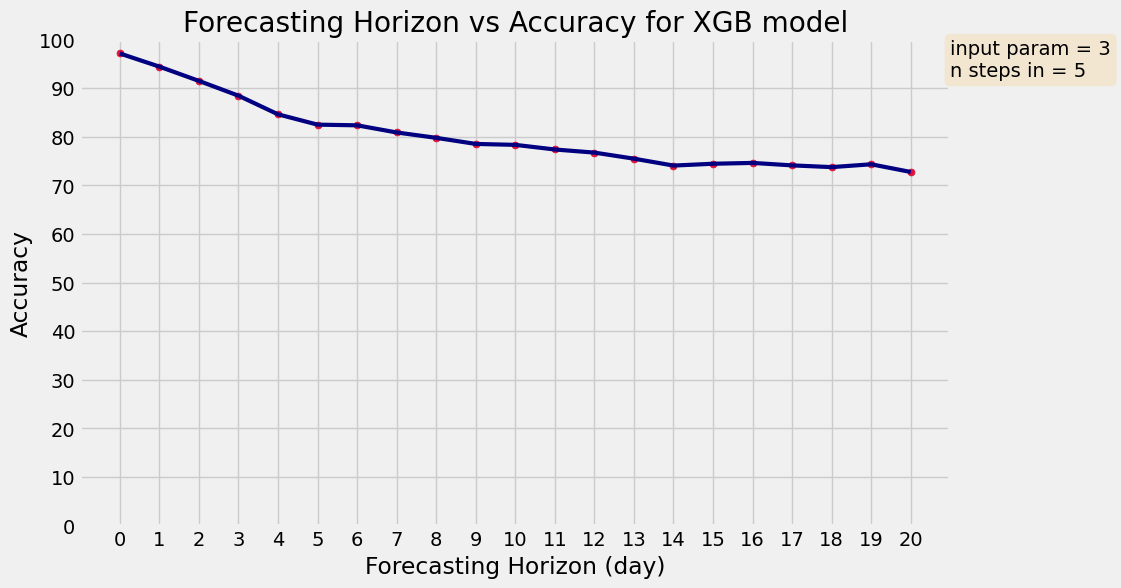

In [ ]:
model_name = "XGB"
input_param = 3
n_steps_in = 5
no_of_days = 20

plot_fh_vs_acc(model_name,input_param,n_steps_in,no_of_days,X_dict,Y_dict,train_start_date,train_end_date,test_start_date,test_end_date)

# Conclusion

Now, finally downloading accuracy dataframe of all the models :

In [ ]:
acc_df_1 = acc_df.set_index('Model')
acc_df_1 = acc_df_1.sort_index()
acc_df_1 = acc_df_1.sort_values(by='r2_score', ascending=False).groupby(level=0).first() #for taking the highest accuracy for a specific model
acc_df_1 #printing dataframe


Input Parameters  ... normalized_centered_root_mean_square_error
Model                                                 ...                                           
DTR1_3_0                           Wlavg-36, PRECTOT  ...                                   0.067013
DTR1_3_1                           Wlavg-36, PRECTOT  ...                                   0.096233
DTR1_3_2                           Wlavg-36, PRECTOT  ...                                   0.127561
DTR1_4_0                           Wlavg-36, PRECTOT  ...                                   0.068793
DTR1_4_1                           Wlavg-36, PRECTOT  ...                                   0.094837
...                                              ...  ...                                        ...
XGB4_5_1                 Based on correlation values  ...                                   0.079386
XGB4_5_2                 Based on correlation values  ...                                   0.098135
v2_Prophet1                        Wlavg-36, PRECTOT  ...                                   0.203871
v2_Prophet2           Wlavg-36, RH2M, T2M_MAX, WS10M  ...                                   0.203431
v2_Prophet3  Wlavg-36, PRECTOT, RH2M, T2M_MAX, WS10M  ...                                   0.201093

[246 rows x 10 columns]

In [ ]:
acc_df_1.to_csv('/content/gdrive/My Drive/plots_colab/summary_of_models.csv') 